# TP1 Data visiualisation


In [5]:
# import libraries :
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Load data :

In [6]:
# Load data set :
data = pd.read_csv("/content/security_attack_dataset.csv")

### Questions :

### 1. Affichez les 10 premières lignes des données.

In [8]:
data.head(10)

,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,2023-01-04 02:00:00,101.237.18.135,DDoS,56.151.20.145,6.545913
1,2023-01-02 05:00:00,13.2.114.130,Malware,239.110.38.24,19.305501
2,2023-01-02 18:00:00,152.233.21.95,Phishing,16.44.123.143,14.675355
3,2023-01-01 01:00:00,171.82.89.172,Malware,237.57.225.215,11.492876
4,2023-01-02 07:00:00,75.135.27.7,Phishing,43.81.255.79,21.218443
5,2023-01-02 09:00:00,115.132.75.69,Phishing,34.103.20.105,9.047682
6,2023-01-03 05:00:00,99.69.4.133,DDoS,181.168.237.231,1.009749
7,2023-01-03 11:00:00,14.182.42.116,Malware,80.196.169.12,13.190158
8,2023-01-02 04:00:00,251.11.7.167,DDoS,45.220.66.66,15.953732
9,2023-01-04 16:00:00,136.88.238.253,Phishing,13.237.239.165,12.347218


### 2. Décrivez les colonnes et leurs types.

In [12]:
for col in data.columns:
  print(f"{col} est de type : {data[col].dtype}")

Timestamp est de type : object
SourceIP est de type : object
AttackType est de type : object
TargetIP est de type : object
AttackDurationHours est de type : float64


### 3. Les données sont de type numérique ou catégoriel, séparez ces deux types de variables. Quel est le nombre de chaque type ?

Les quatre premières colonnes sont de type object (chaîne de caractères), la seule colonne qui est de type numérique est `AttackDurationHours`.

### 3. Créez un diagramme à barres pour visualiser les différents types d’attaques nous permettant de comprendre la répartition des types d’attaques de sécurité dans le dataset ? Le diagramme affichera la fréquence ou le nombre de chaque type d’attaque.

In [21]:
dtype_count = dict(data['AttackType'].value_counts())

In [50]:
attack_types = list(dtype_count.keys())
attack_type_count = np.array(list(dtype_count.values()))

<Axes: >

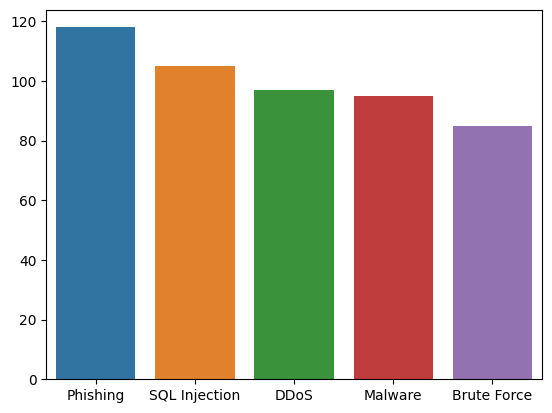

In [51]:
sns.barplot(x= attack_types, y=attack_type_count)

Le diagramme affiche le type d'attaque en fonction du nombre de ces attaques.

### Afin de définir combien d’attaques se produisent chaque heure pour mieux comprendre les tendances temporelles des attaques de sécurité ? Affichez la fréquence des attaques sur une base horaire ?

La première chose à faire est de créer une nouvelle colonne qui contient le nombre d'heures.

In [39]:
# créer la coulone Heure :
data['Hour'] = data['Timestamp'].apply(lambda time : int(time.split()[1].split(":")[0]))

In [41]:
data.head()

,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours,Hour
0,2023-01-04 02:00:00,101.237.18.135,DDoS,56.151.20.145,6.545913,2
1,2023-01-02 05:00:00,13.2.114.130,Malware,239.110.38.24,19.305501,5
2,2023-01-02 18:00:00,152.233.21.95,Phishing,16.44.123.143,14.675355,18
3,2023-01-01 01:00:00,171.82.89.172,Malware,237.57.225.215,11.492876,1
4,2023-01-02 07:00:00,75.135.27.7,Phishing,43.81.255.79,21.218443,7


In [43]:
# dans une question précedente on a :
attack_types, attack_type_count

(['Phishing', 'SQL Injection', 'DDoS', 'Malware', 'Brute Force'],
 [118, 105, 97, 95, 85])

In [66]:
attack_frequency = data.groupby('Hour')['AttackType'].count().reset_index()
attack_frequency

,Hour,AttackType
0,0,19
1,1,14
2,2,22
3,3,26
4,4,17
5,5,25
6,6,24
7,7,17
8,8,18
9,9,29


<Axes: xlabel='Hour', ylabel='AttackType'>

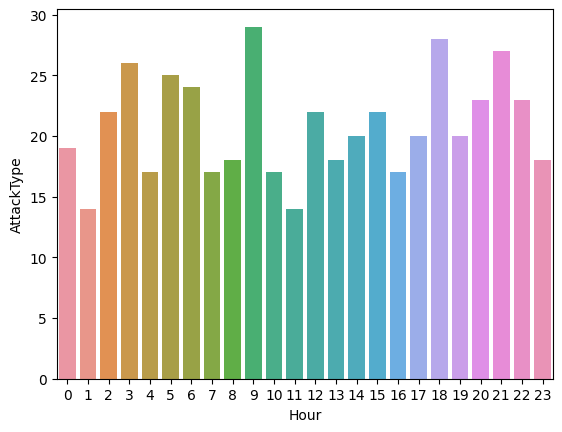

In [67]:
sns.barplot(x="Hour", y='AttackType', data=attack_frequency)

### 6. Créez un diagramme à barres pour visualiser la distribution des fréquences d’attaques par jour ?

In [68]:
data

,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours,Hour
0,2023-01-04 02:00:00,101.237.18.135,DDoS,56.151.20.145,6.545913,2
1,2023-01-02 05:00:00,13.2.114.130,Malware,239.110.38.24,19.305501,5
2,2023-01-02 18:00:00,152.233.21.95,Phishing,16.44.123.143,14.675355,18
3,2023-01-01 01:00:00,171.82.89.172,Malware,237.57.225.215,11.492876,1
4,2023-01-02 07:00:00,75.135.27.7,Phishing,43.81.255.79,21.218443,7
...,...,...,...,...,...,...
495,2023-01-01 22:00:00,98.52.31.211,Brute Force,201.156.224.9,14.065184,22
496,2023-01-01 09:00:00,148.202.6.70,DDoS,157.182.127.153,8.542786,9
497,2023-01-01 09:00:00,77.133.29.251,Phishing,3.147.179.204,7.493665,9
498,2023-01-03 04:00:00,16.240.62.19,DDoS,184.38.110.39,9.737478,4
